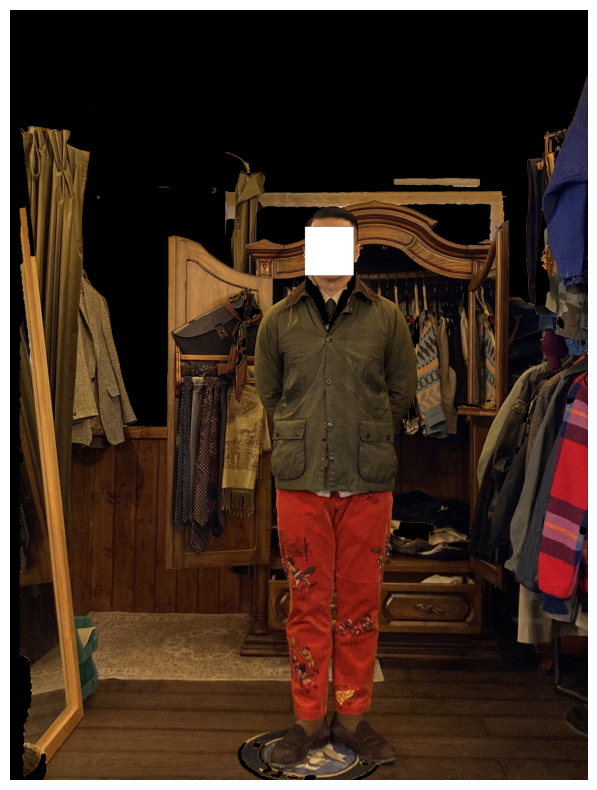

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 읽기
img_path = '/home/gyuha_lee/DCC2024/dataset/training_image/T_21991_70_hippie_M.jpg'
img = cv2.imread(img_path)

# 이미지 크기
mask = np.zeros(img.shape[:2], np.uint8)

# GrabCut에서 사용할 임시 배열
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Rect로 전경(옷)을 감싸는 영역 설정
rect = (50, 50, img.shape[1] - 50, img.shape[0] - 50)

# GrabCut 알고리즘을 사용하여 전경 및 배경 분리
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 배경과 전경을 구분하는 마스크 생성
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# 원본 이미지에서 전경만 남기고 배경 제거
img_result = img * mask2[:, :, np.newaxis]

# 결과 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()